# **Genetic Algorithms**

In this notebook we are going to take a look at a genetic algorithm and use it to find an image as the target. The process will mimic the biological genetic information progression by inherited features from a set of parents, a family of descendants and many generations. 


<center> 
   <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Darwin%27s_finches_by_Gould.jpg" width=500>
</center>


**Overview:**

0. Create random parents with values in the range of the image.
1. Make descendants with by taking info from each parent with a 50/50 chance to inherit from each parent. 
    1. Total number of descendants is made up the family for each generation.
3. Each descendant of the family is tested against the current target. The two best descendants make the parents for the next generation.
4. We will repeat this process till we hit the value set for the generations. 

_Goal at the end is to get the image from this process._

In [1]:
# Pillow for working with images.
from PIL import Image, ImageOps

In [2]:
# Main tools loaded up.
import numpy as np # Numbers
import pandas as pd # Data
import matplotlib.pyplot as plt # Plots
from tqdm import tqdm # Timing

## **Load the Image that we will Target**

We will use the image below as the target. To train we will slice each row as a target vector and evolve a vector to find each. We will then put all the evolved vectors back in the order they were "found" and this will be the evolved image. 

For time purposes we will reduce the size of the image to 5% of the original. We will also grayscale the image so that we only need to work with one layer. 

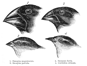

In [8]:
# Read in the image that we will be finding. 
image = Image.open('Darwins_finches_by_Gould.jpg')

# Convert to grayscale and resize. 
image = ImageOps.grayscale(image)
image = image.resize((round(image.size[0]*0.05), round(image.size[1]*0.05)))
image

## **Check The Shape of the Image**

In this cell we will take a quick look at the image and see what we are starting with. In the demo at the bottom of the notebook this will be the target. We will also take a look at the overall shape to see what size we are going to be working with as well as the max and min values. We will us this max and min information to determine what the domain of values should be for the parents.

(66, 87)
255 18


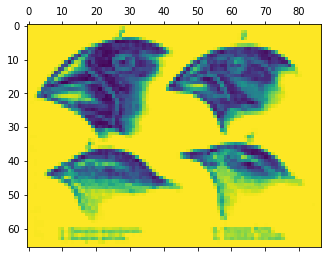

In [9]:
# Make the image and array.
target = np.array(image)

# Show the array using matshow.
plt.matshow(target)

# Print the shape and the max and min.
print(np.shape(target))
print(np.max(target), np.min(target))

## **The Evolution**
Below is the function that actually evolves the descendants for the task as well as the one that makes the initial parents. 

In [5]:
def make_parents(target):
    
    '''
        Establishes the initial parents.
        
        Input:
            target (array): Vector for the target.
            
        Output:
            parent_1 (array): Initial parent vector 1.
            parent_2 (array): Initial parent vector 2.
    
    '''
    
    # Set two random variables to establish the parents.
    r1 = np.random.rand(np.shape(target)[0])
    r2 = np.random.rand(np.shape(target)[0])

    # Intial parents with values that are in the target domain.
    parent_1 = np.max(target) * r1 + np.min(target) * (1 - r1)
    parent_2 = np.max(target) * r2 + np.min(target) * (1 - r2)
    
    # Return the initial random parents with values in the target domain.
    return(parent_1,parent_2)

In [6]:
def evolution(parent_1, parent_2, target, total_generations, total_descendants, mutation_prob):

    '''
        Starting with two initial vectors, the function will randomly select the parent to pass the material 
        to a descendant. The descendants are tested against the target and, of each family, the best two are 
        selected as parents in the next generation. The testing is the euclidean norm. 
    
        Inputs:
            parent_1 (array): One of the two parent vectors. 
            parent_2 (array): One of the two parent vectors.
            target (array): Target vector.
            total_generations (int): Total number of generations.
            total_descendants (int): Total number of descendants for each generation.
            mutation_prob (float 0.0 , 1.0): Probability of mutation for each entry in the descendant vector. 
    
        Return:
            parent_1 (array): Will be the best after all the evolution.
    
    '''
    
    # Check the length of the parent.
    vec_length = len(parent_1)

    # Start the generations count at zero.
    g = 0
    
    # List for the history for each row of the image.
    history = []
    
    # Loop for the generations.
    while g < total_generations:
        
        # Start the count for the family size. 
        i = 0
        
        # List for the descendants for each generation.
        family = []
        
        # Loop for the children.
        while i < total_descendants:
            
            # Start the counter for the build for each descendant. 
            j = 0
            
            # Blank vector for the new descendant. Length set to parent.
            descendant = list(np.zeros((vec_length,1)))
            
            # Loop for all the entries in the descendant vector. 
            while j < vec_length:

                # Coin flip for which parent to choose. 
                rand_val = np.random.randint(10)

                # Inherit jth entry from parent 1.
                if rand_val < 6:
                    descendant[j] = parent_1[j]
                    
                # Inherit jth entry from parent 2.
                else:
                    descendant[j] = parent_2[j]

                # Random mutation. 
                if rand_val <= 9 * mutation_prob:
                    
                    # Random value for the mutation. 
                    r3 = np.random.rand()
                    
                    # Mutate the jth entry. The range is set to fit the values from the target.
                    descendant[j] = np.max(target) * r3 + np.min(target) * (1 - r3)
                
                # Move to the next entry in the current decendent vector. 
                j += 1

            # Append to the family for the current generation.
            family.append(descendant)
            
            # Index to the next descendant. 
            i += 1

        # List to collect the scores.
        scores = []
        
        # Loop over all the descendants in the current generation.
        for k in family:
            
            # Test each descendant against the target. 
            
            # Note on score: This is where we could put another test for fitness. If we didn't have a target, 
            # we would could include a different measure of success and use that as the score. 
            # Scoring tools could be far more involved than what we have here, but this is nice for a first build. 
            s = np.linalg.norm(k - target)
            
            # Append to the list of score. 
            scores.append(s)

        # Best score for each generation.
        history.append(np.sort(scores)[0])
        
        # Location for the best two descendants in the current generation.
        new_parents = np.argsort(scores)[:2]

        # Assign the next two parents. 
        parent_1 = family[new_parents[0]]
        parent_2 = family[new_parents[1]]

        # Index up to the next generation.
        g += 1

    return(parent_1, history)

## **Quick Test**

Before we look at the image, we will do a quick check with a target vector

In [15]:
target_0 = np.array([0,1,2,3,4,5,6,7,8,9,0])

parent_0_1, parent_0_2 = make_parents(target_0)

gen_line_0, hist_0 = evolution(parent_0_1, parent_0_2, target_0, 200, 100, .1)

[0.0062936404894261555, 1.0072764263687302, 2.0063925577633697, 2.9984818577455727, 3.9881482589755923, 4.995980705285571, 5.998623346363418, 6.98659568651355, 8.00243802033854, 8.980877870364806, 0.005027777178339243]


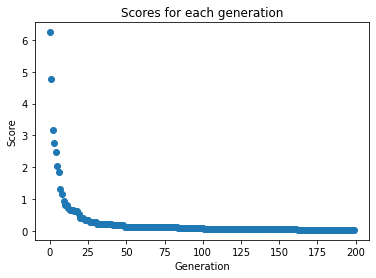

In [16]:
t_0 = np.arange(np.shape(hist_0)[0])

print(gen_line_0)
plt.scatter(t_0, hist_0)
plt.title("Scores for each generation")
plt.xlabel("Generation")
plt.ylabel("Score")
plt.show()

## **Looping over the Image**
To deal with the image we are going to break it down into rows of the image. Each row will be a target vector, and we will evolve our vectors to become these rows. After each row is evolved we will append it to the generated image and then display what we have made. 

In [10]:
# List to collect the evolved image (row by row). 
gen_image = []

# List to collect the history for the scores for each row.
total_history = []

# Loop over all the row of the image. These are our targets.
for line in tqdm(target):
    
    parent_1, parent_2 = make_parents(line)
    
    # Run the evolution. Two initial parents, the target, the number of generations, the number of descendants and the
    # probability of mutation. We will collect the generated line and the score history. 
    gen_line, hist = evolution(parent_1, parent_2, line, 100, 100, .1)
    
    # Append the scores and the rows for the evolved rows.
    total_history.append(hist)
    gen_image.append(gen_line)

100%|██████████| 66/66 [08:08<00:00,  7.40s/it]


### **The Evolved Image and The Overview**

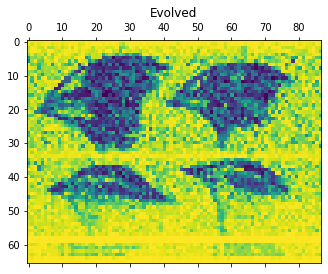

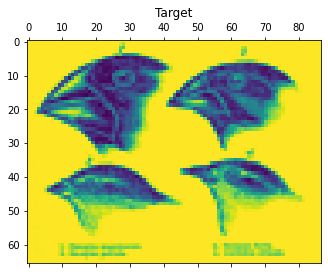

In [17]:
# Plot the image that we evolved. 
plt.matshow(np.array(gen_image))
plt.title("Evolved")

# Plot thr image that was the target.
plt.matshow(target)
plt.title("Target")
plt.show()

In the next cell we are will plot all the scores for all the rows of the image from the generation as we evolved. 

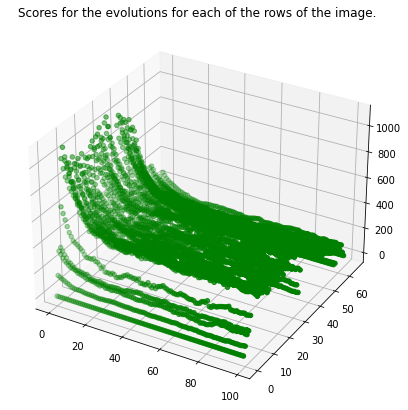

In [18]:
# Time range for the steps of the scores.
t = np.arange(len(np.array(total_history)[1,:]))

# Range for to allow us to plot through the rows of the image.
z = np.arange(np.shape(np.array(total_history))[1])

# Setup the figure and the axis. 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Start the counter for the all the rows.
l = 0
    
# Creating plot looping over all the rows-scores. 
while l < np.shape(np.array(total_history))[0]:
    
    # Plot the scattered scores for the current row of the image
    ax.scatter3D(t, l, np.array(total_history)[l,:], color = "green")
    
    # Up the index.
    l+=1

# Title and show the image.
plt.title("Scores for the evolutions for each of the rows of the image.")
plt.show()